# Lecture 2 - Image Classification
***
**Image classification** is the task of assigning the correct class label of an input image, given a set of discrete labels. This seemingly simple task can later be extended to other computer vision tasks such as object detection or segmentation.

![image.png](http://cs231n.github.io/assets/classify.png)

Although to the human eye image classification is trivial, because an image is represented as on large 3-dimensional(RGB) array of pixel values to a computer, turning a million numbers into a single class label is quite difficult.

Therefore, there are some challenges a computer must overcome to accurately classify images.

#### Challenges
- **Semantic Gap** : Numbers to do contain semantic meaning of images
- **Viewpoint Variation** : A sinlge object can be oriented in many ways respective to the camera
- **Illumination** : The level of illumination of objects have drastic effects on pixel values
- **Deformation** : Many non-rigid objects can deform in extreme ways
- **Occlusion** : Sometimes only a small portion of an object can be visible.
- **Background Clutter** : Objects might blend into their background
- **Interclass Variation** : There can be many different types of objects, each having a distinct appearance

We take a **data-driven approach** in solving the classification problem.
#### Data-driven Approach
That is, after collecting a dataset of images and their corresponding labels, we train a machine learned classifier, and use this classifier to evaluate the class label of a new image.

In other words, we classify new images with a model created in a 3-step process
1. **Input** : Load data as the *training set* that consists of labeled images
2. **Learn** : Train a classifier based on the training set
3. **Evaluate** : Evaluate the quality of the classifier by making it label new images, and comparing them with the true labels of those images.

The **nearest neighbor classifier** is a very simple and rarely used classifier that can help us understand the basic approach of image classification

# Nearest Neighbor Classifier
When given a new image, the NN classifier compares it with every image in the training set and finds the most similar(*nearest*) one. It selects the label of that image as the predicted label of the input image.

1. **Train**: Mermorize all data and corresponding labels (*O(1)*)
2. **Predict**: Find the most similar image and decide on that label (*O(n)*)

#### Example

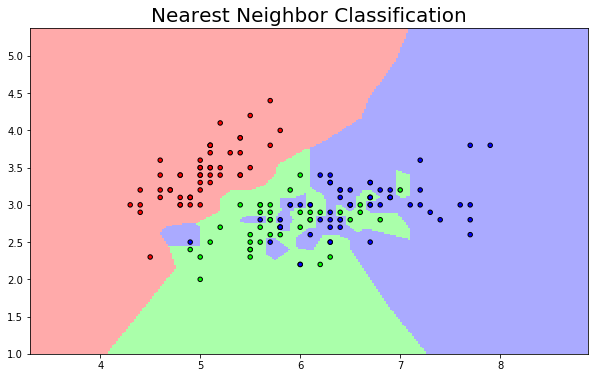

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def draw(model, X, y, title):
    # Plot the decision boundary(assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title, fontsize=20)

    plt.show()
    
# Load example data
iris = datasets.load_iris()

# Slice to obtain 2-dimensional data
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create an instance of Neighbours Classifier and fit the data.
kNN = neighbors.KNeighborsClassifier(n_neighbors=1)
kNN.fit(X, y)

draw(kNN, X, y, 'Nearest Neighbor Classification')

We can observe from the image above that the NN classifier doesn't do a good job; there are 'islands' of decision regions created by elements far away from their cluster(*outliers*).

### KNN (K-Nearest Neighbors)
Rather than relying on the most siimilar image, a **kNN classifier** takes a majority vote from k nearest points of the input. A higher k gives a smoothing effect to the decisions boundaries, making it more resistant to outliers.

## Choosing Hyperparameters
**Hyperparameters** are choices about the algorithm that needs to be chosen by the user, rather than learned by the model itself.

For a kNN classifier, there are 2 main hyperparameters.

### 1. Distance Metric

The distance metric computes the difference between images, therefore allowing us to select the 'nearest' image.

The difference between images, therefore, depends on which distance metric the model uses.
It is difficult to learn which distance metric is better fitting to the dataset

- **L1 (Manhattan)** distance: $d_1(I_1, I_2) = \sum_p|I_1^p - I_2^p|$
    - Depends on the coordinate system: better for images in which coordinates have some importance
- **L2 (Euclidean)** distance: $d_2(I_1, I_2) = \sqrt{\sum{I_1^p - I_2^p}^2}$

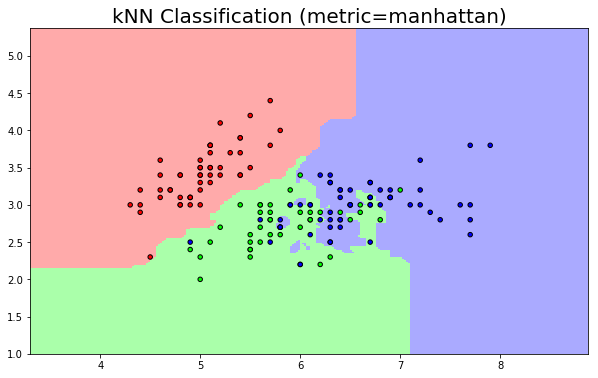

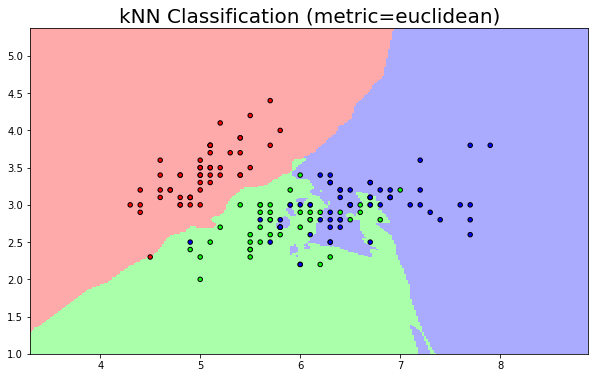

In [34]:
metric_list = ['manhattan', 'euclidean']
for metric in metric_list:
    kNN = neighbors.KNeighborsClassifier(metric=metric)
    kNN.fit(X, y)

    draw(kNN, X, y, 'kNN Classification (metric=%s)'%(metric))

### 2. K
Different Ks' result in differenct shapes for deicision regions.

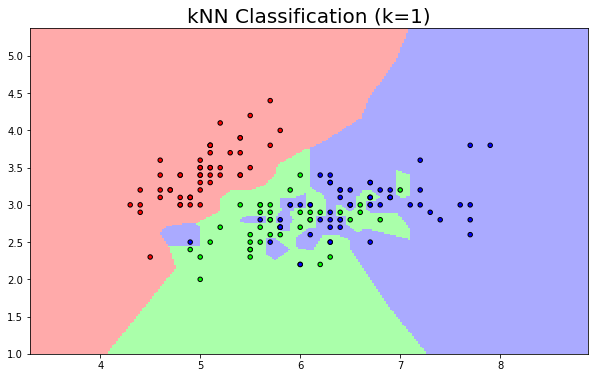

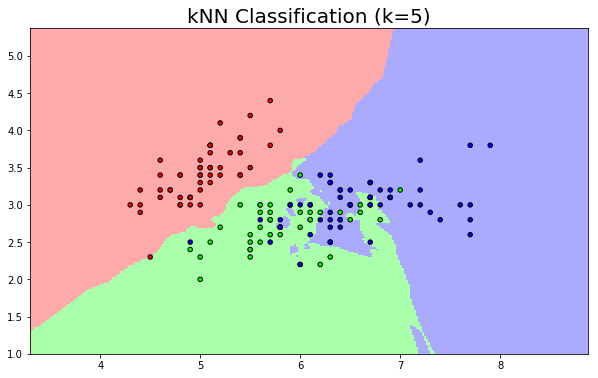

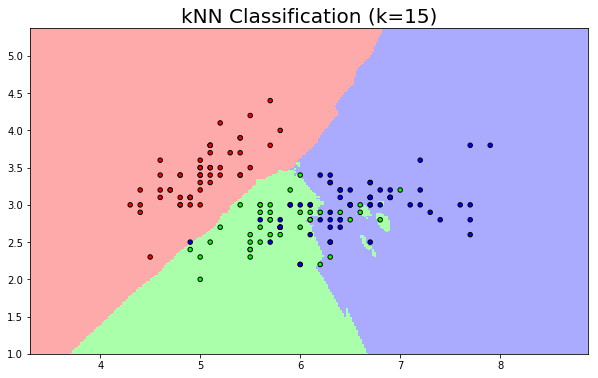

In [33]:
k_list = [1, 5, 15]
for k in k_list:
    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X, y)

    draw(kNN, X, y, 'kNN Classification (k=%i)'%(k))

## Pros & Cons
### Pros (Advanatages)
1. Simple implementation and interpretation
2. No training time

### Cons (Drawbacks)
1. Testing(Validating) time is expensive

In practice, the high computational cost of testing enormously outweighs the advantage of short training time. We wish to build a model, however long it takes, that can be run efficiently.
2. Curse of Dimensionality

The higher the dimension of data, the more sparse data becomes, making it almost impossible to build a precise model.
3. Inaccurate distance metric

kNN classifiers highly depend on accurate distance metrics to measure the 'similarity' between images. However, the commonly used L1 or L2 metrics have a hard time deciding which points are near in high-dimensional objects like images.